In [1]:
#1
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#2
insurance_df = pd.read_csv('insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# 3-a To know the number of rows and columns in the Insurance Dataset

In [4]:
Dataset_shape = insurance_df.shape
rows,columns = Dataset_shape # Getting rows and columns from shape of the dataframe
print("Insurance Dataset has "+str(rows)+" rows and "+str(columns)+" columns.")

Insurance Dataset has 1338 rows and 7 columns.


In [5]:
# 3-b To know datatype of each data in the Insurance Dataset

In [6]:
Column_names=insurance_df.columns #Get the column names in the insurance dataframe

#Looping through each column and displaying its datatype
for column in Column_names:
    print("Datatype of "+column+" in the Insurance Dataset is "+str(insurance_df.dtypes[column])) 

Datatype of age in the Insurance Dataset is int64
Datatype of sex in the Insurance Dataset is object
Datatype of bmi in the Insurance Dataset is float64
Datatype of children in the Insurance Dataset is int64
Datatype of smoker in the Insurance Dataset is object
Datatype of region in the Insurance Dataset is object
Datatype of charges in the Insurance Dataset is float64


In [7]:
# 3-c To find missing values for anydata in the Insurance Dataset

In [8]:
NullColumns = 0 # This is the count of the number of null variables
NullColumnNames = [] #This list will have the name of the columns which has null values
TotalNullValues = insurance_df.isnull().sum().sum()  # Gives the sum of the sum of all the null's in the insurance dataframe

if TotalNullValues == 0:
    print("All the values in the Insurance Dataset has a valid value and there are no Nulls for any data")

# If there are null values, find the number of null values and the name of the column which has null value and display them
else:
    for column in Column_names:
        NullCount = insurance_df[column].isnull().sum()
        if(NullCount>0):
            TotalNullCounts = insurance_df[column].isnull().sum()
            #print("There are "+str(TotalNullCounts)+" null values for the "+column+" data in the Insurance Dataset")
            NullColumns = NullColumns+1
            NullColumnNames.append(column)
    print("There are "+str(NullColumns)+" data columns which has null values in the Insurance Dataset and below are the columns:")
    for nullcolumn in NullColumnNames:
        print(nullcolumn)

All the values in the Insurance Dataset has a valid value and there are no Nulls for any data


In [9]:
#3-d To Find the five point summary of the Insurance Dataset

In [11]:
FivePointColumnNames=[] #This list will contain the column names which is applicable for the 5point summary analysis

#Declaring the list arrays, which will hold the 5point summary values for each column in the insurance dataframe
data_mini=[]
data_25Percent = []
data_50Percent = []
data_75Percent = []
data_maxi = []

#Loop through the columns in dataframe and add column names to FivePointColumnNames if they are of type intergers
for column in Column_names:
    if "int" in str(insurance_df.dtypes[column]) or "float" in str(insurance_df.dtypes[column]):
        FivePointColumnNames.append(column)   
        
#Loop through our created list, and find the 5point summary of each column in the Insurance dataframe        
for column in FivePointColumnNames:  
    quartiles = np.percentile(insurance_df[column], [25, 50, 75])
    mini, maxi     = insurance_df[column].min(),insurance_df[column].max()
    data_mini.append(mini)
    data_maxi.append(maxi)
    data_25Percent.append(quartiles[0])
    data_50Percent.append(quartiles[1])
    data_75Percent.append(quartiles[2])      

#Creating a dataframe for the columns with the 5point Summary
FivePointSummary = pd.DataFrame([data_mini,data_25Percent,data_50Percent,data_75Percent,data_maxi],index=('min','25%','50%','75%','max'),columns=(FivePointColumnNames))
FivePointSummary

,age,bmi,children,charges
min,18.0,15.96000,0.0,1121.873900
25%,27.0,26.29625,0.0,4740.287150
50%,39.0,30.40000,1.0,9382.033000
75%,51.0,34.69375,2.0,16639.912515
max,64.0,53.13000,5.0,63770.428010


In [12]:
# 3-e To know the distribution of age, bmi and charges

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000181BB4AC080>,
      dtype=object)

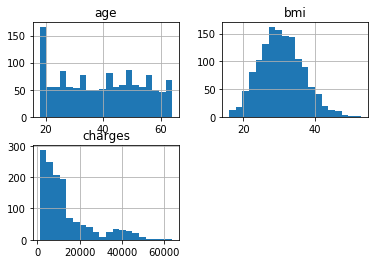

In [14]:
insurance_df.hist(column=['age','bmi','charges'],bins=20)

In [ ]:
# 3-f To find the skewness in Age, Bmi and charges in Insurance Dataframe

In [21]:
skew_columnNames = ['bmi','age','charges']
for x in skew_columnNames:
    print("Skewness of "+x+" in insurance dataset is "+str(insurance_df[x].skew(axis = 0, skipna = True)))

Skewness of bmi in insurance dataset is 0.2840471105987448
Skewness of age in insurance dataset is 0.05567251565299186
Skewness of charges in insurance dataset is 1.5158796580240388


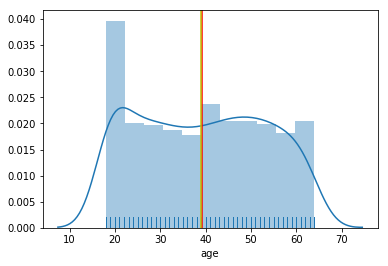

In [24]:
age_mean = np.round(insurance_df['age'].mean(),decimals=3)
age_median = np.round(insurance_df['age'].median(),decimals=3)
ageplot=sns.distplot(insurance_df['age'],hist=True,kde=True,rug=True)

#Plotting the Mean and Median, to know how the data curve is skewed towards both sides of the mean and median for age
ageplot.axvline(x=age_mean,color='r')
ageplot.axvline(x=age_median,color='y')

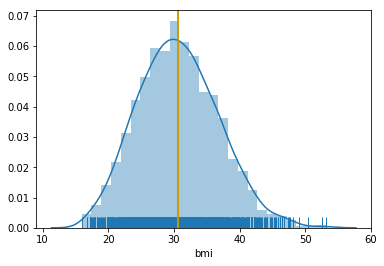

In [23]:
bmi_mean = np.round(insurance_df['bmi'].mean(),decimals=3)
bmi_median = np.round(insurance_df['bmi'].median(),decimals=3)
bmiplot=sns.distplot(insurance_df['bmi'],hist=True,kde=True,rug=True)

#Plotting the Mean and Median, to know how the data curve is skewed towards both sides of the mean and median for bmi
bmiplot.axvline(x=bmi_mean,color='r')
bmiplot.axvline(x=bmi_mean,color='y')

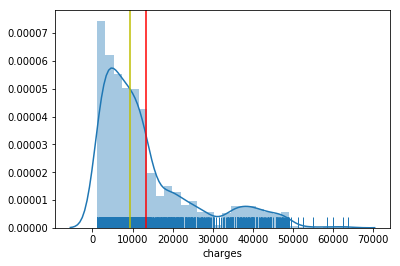

In [22]:
charges_mean = np.round(insurance_df['charges'].mean(),decimals=3)
charges_median = np.round(insurance_df['charges'].median(),decimals=3)
chargesplot=sns.distplot(insurance_df['charges'],hist=True,kde=True,rug=True)

#Plotting the Mean and Median, to know how the data curve is skewed towards both sides of the mean and median for Charges
chargesplot.axvline(x=charges_mean,color='r')
chargesplot.axvline(x=charges_median,color='y')

#It can be seen that data curve is not normally distributed, but skewed towards the left

In [69]:
# 3-g Find Outliers in Age, Bmi and Charges in the Insurance Dataset

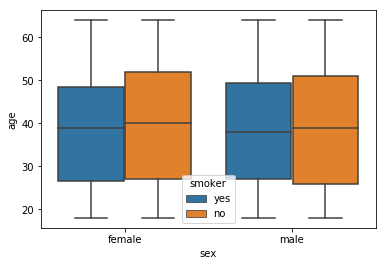

In [70]:
sns.boxplot(x='sex',y='age',hue='smoker',data=insurance_df)

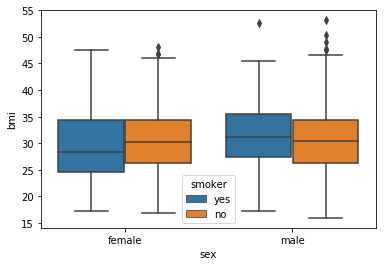

In [71]:
sns.boxplot(x='sex',y='bmi',hue='smoker',data=insurance_df)

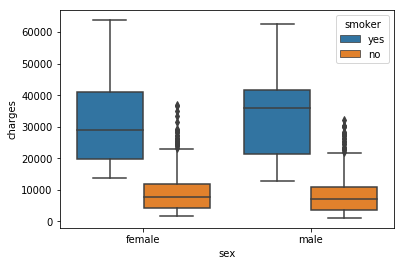

In [72]:
sns.boxplot(x='sex',y='charges',hue='smoker',data=insurance_df)

In [73]:
# 3-h Visualizing the Categorical Variable Distributions

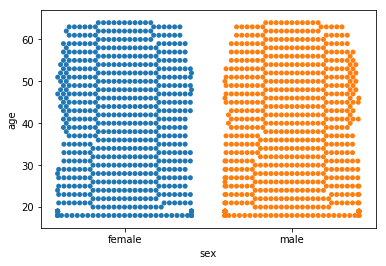

In [74]:
sns.swarmplot(insurance_df['sex'],insurance_df['age'])

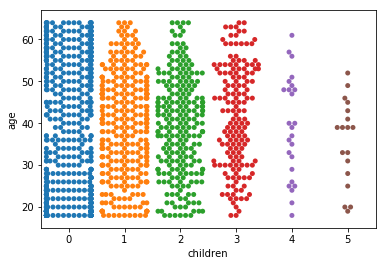

In [75]:
sns.swarmplot(insurance_df['children'],insurance_df['age'])

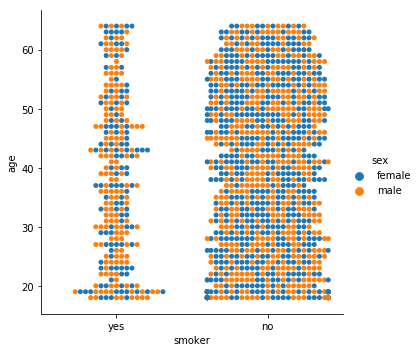

In [76]:
sns.catplot(x='smoker',y='age',data=insurance_df,hue='sex',kind="swarm")

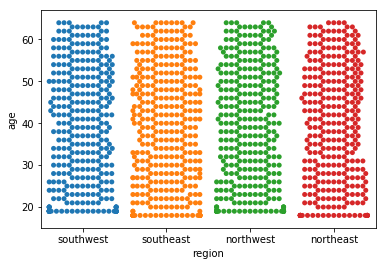

In [77]:
sns.swarmplot(insurance_df['region'],insurance_df['age'])

In [89]:
# 3-i Pair Plot of all variables in Insurance Dataset

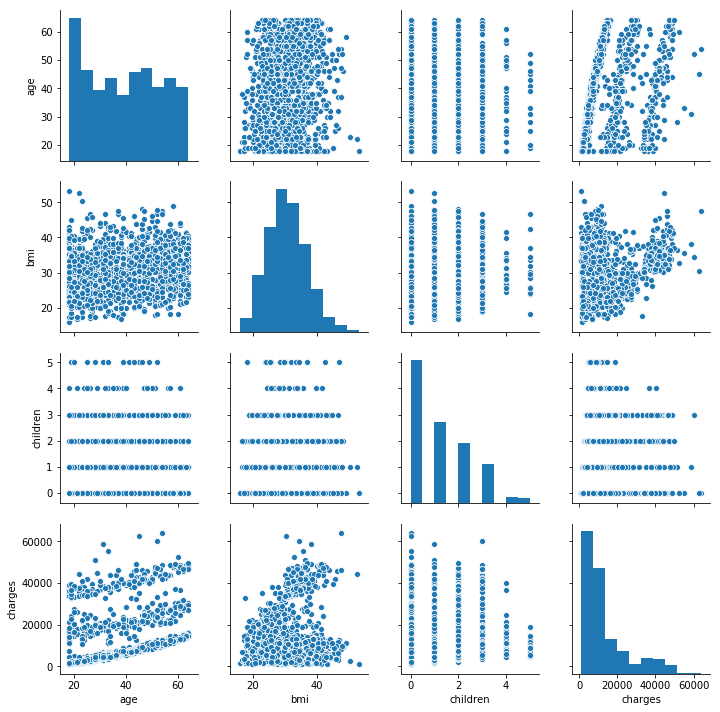

In [79]:
sns.pairplot(insurance_df)

In [80]:
# 4-a Find with statistical evidence that charges of smoker and non-smoker differ or not?

In [25]:
from scipy.stats import *
from statsmodels.stats.power import *

#Get the charges of people who smoke and not smoke as a series
Charges_Smoker = insurance_df[insurance_df['smoker']=='yes']['charges']
Charges_NonSmoker = insurance_df[insurance_df['smoker']=='no']['charges']

t_statistic,p_value = ttest_ind(Charges_Smoker,Charges_NonSmoker)
print(t_statistic,p_value)

#Set Significance Level at 5%
if p_value<0.05:
    print("Rejecting the Null hypothesis --> There is a 95 percent proof that mean Charges of Smoker and Nonsmoker differ significantly")
else:
    print("Null Hypothesis Retained --> Mean Charges of smoker and nonsmoker do not differ")

46.664921172723716 8.271435842177219e-283
Rejecting the Null hypothesis --> There is a 95 percent proof that mean Charges of Smoker and Nonsmoker differ significantly


In [83]:
# 4-b Find with statistical evidence that bmi of males and females differ or not?

In [84]:
#Get bmi of males and females separately in a series
Bmi_Male = insurance_df[insurance_df['sex']=='male']['bmi']
Bmi_Female = insurance_df[insurance_df['sex']=='female']['bmi']

t_statistic,p_value = ttest_ind(Bmi_Male,Bmi_Female)
print(t_statistic,p_value)

#Set Significance Level at 5%
if p_value<0.05:
    print("Rejecting the Null Hypothesis -> There is a 95 percent proof that mean bmi of male and female differ significantly")
else:
    print("Null Hypothesis retained --> Mean Bmi of male and female are same")

1.696752635752224 0.08997637178984932
Null Hypothesis retained --> Mean Bmi of male and female are same


In [85]:
# 4-c Find statistically Is the proportion of smokers significantly different in different genders?

In [26]:
# Get the count of persons who smokes and not smokes as an array, and extract the count of people who smoke
FemaleSmokers_Count = insurance_df[insurance_df['sex']=='female']['smoker'].value_counts()[1]
MaleSmokers_Count = insurance_df[insurance_df['sex']=='male']['smoker'].value_counts()[1]

#Get female and male people count
TotalFemalesCount = insurance_df['sex'].value_counts()[1]
TotalMalesCount = insurance_df['sex'].value_counts()[0]

#print(f'Proportion of smokers in females, males = {round(FemaleSmokers_Count/TotalFemalesCount,2)}%, {round(MaleSmokers_Count/TotalMalesCount,2)}% respectively')

from statsmodels.stats.proportion import proportions_ztest

#Check proportion of female smokers among female population and male smokers among male population
stat, pval = proportions_ztest([FemaleSmokers_Count, MaleSmokers_Count] , [TotalFemalesCount, TotalMalesCount])
print(f'stats and zvalue are {stat} and {pval}')

#Null Hypothesis = There is no difference between male and female smokers count
#Alternate Hypothesis = There is significant difference between male and female smokers count
# Set signiicance level at 5%

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant.--> We reject the null hypothesis, therefore there is 95% statistical proof that Male and Female Smokers Count are not statistically equal')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. ->>We fail to reject the null|; i.e Male and Female smokers count is statistically equal')

stats and zvalue are -2.7867402154855503 and 0.005324114164320532
With a p-value of 0.0053 the difference is significant.--> We reject the null hypothesis, therefore there is 95% statistical proof that Male and Female Smokers Count are not statistically equal


In [27]:
# 4d - Is the distribution of bmi across women with no children, one child and two children, the same ?

In [30]:
import statsmodels.api as sm
from   statsmodels.formula.api import *

#Extract bmi of women having 0,1 and 2 children
BMI_Women_NoChild = insurance_df[(insurance_df['sex']=='female') & (insurance_df['children']==0)]['bmi']
BMI_Women_OneChild = insurance_df[(insurance_df['sex']=='female') & (insurance_df['children']==1)]['bmi']
BMI_Women_TwoChild = insurance_df[(insurance_df['sex']=='female') & (insurance_df['children']==2)]['bmi']

Anova_df = pd.DataFrame()
BMI_Women_NoChild_df1 = pd.DataFrame({'ChildCount':0,'BMI_Women':BMI_Women_NoChild})
BMI_Women_Child_df2 = pd.DataFrame({'ChildCount':1,'BMI_Women':BMI_Women_OneChild})
BMI_Women_Child_df3 = pd.DataFrame({'ChildCount':2,'BMI_Women':BMI_Women_TwoChild})

#Wrapping all women having 0,1,2 child with their corresponding BMI into a dataframe
Anova_df = Anova_df.append(BMI_Women_NoChild_df1,sort=True)
Anova_df = Anova_df.append(BMI_Women_Child_df2,sort=True)
Anova_df = Anova_df.append(BMI_Women_Child_df3,sort=True)
 
women_bmi = ols('BMI_Women ~ ChildCount', data = Anova_df).fit()
aov_table = sm.stats.anova_lm(women_bmi, typ=2) # Performing a 2way anova test
p_value = aov_table['PR(>F)'][0] #Get the P value from anova table

#Set significance level at 5 percent

if p_value<0.05:
    print(f'With P value of {p_value} We reject null hypothesis,i.e Distribution of BMI for women with zero, one and two child are not equal')
else:
    print(f'With P value of {p_value} We fail to reject null hypothesis, i.e Distribution of BMI for women with zero, one and two child are statistically equal')

With P value of 0.7937600294537167 We fail to reject null hypothesis, i.e Distribution of BMI for women with zero, one and two child are statistically equal
